<h1 align='center'> Modeling Traffic - Nagel Schreckenberg </h1>

The Nagel–Schreckenberg model is a theoretical model for the simulation of freeway traffic. The model was developed in the early 1990s by the German physicists Kai Nagel and Michael Schreckenberg.

It is essentially a simple <b> cellular automaton </b> model for road traffic flow that can reproduce traffic jams, i.e., show a slow down in average car speed when the road is crowded (high density of cars). The model shows how traffic jams can be thought of as an emergent or collective phenomenon due to interactions between cars on the road, when the density of cars is high and so cars are close to each other on average.

### Importing Libraries

In [1]:
import random
from random import uniform, shuffle
import matplotlib.pyplot as plt
import numpy as np
random.seed(5)

### Declaring Variables

In [2]:
L = 100 # number of cells in row
I = 100 # number of iterations
density = 0.3 #car density on the road
vmax = 20 #maximum velocity
p = 0.2 #probability of applying brakes
cars_num = int(density * L) # number of cars on the road
initial=[0]*cars_num + [-1]*(L-cars_num)
shuffle(initial)
iterations = [initial] #initial positions of cars on the road

### Algorithm

In [3]:
for i in range(I):
    prev,curr = iterations[-1],[-1] * L
    for x in range(L):
        
        #Checking if there was a car at position x in the previous timestep
        if prev[x] > -1: 
            vi = prev[x]
            
            #Calculating distance from car ahead
            d = 1
            while prev[(x + d) % L] < 0:
                d += 1
                
            #increase v up to max speed, but don't move further than next car
            vtemp = min(vi+1, d - 1, vmax) 
            
            #with probability p hit the brakes, otherwise sustain velocity
            v = max(vtemp - 1, 0) if uniform(0,1) < p else vtemp 
            
            #move the car
            curr[(x + v) % L] = v 

    iterations.append(curr)
    
pos = np.zeros(shape=(I,L))
for i in range(I):
    for j in range(L):
        pos[i,j] = 1 if iterations[i][j] > -1 else 0

### Graphical representation

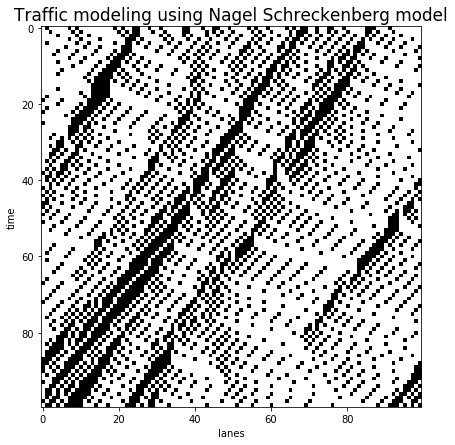

In [4]:
fig=plt.figure(figsize=(7,7))
plt.title('Traffic modeling using Nagel Schreckenberg model',fontsize=17)
plt.xlabel('lanes')
plt.ylabel('time')
plt.imshow(pos, cmap="Greys", interpolation="nearest")
plt.savefig('traffic.png')